# <center>Machine Learning Project Code</center>

<a class="anchor" id="top"></a>

## <center>*03 - K-Fold*</center>

** **



# Table of Contents  <br>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>
    
2. [Cross Validation](#2.-Cross-Validation) <br><br>

3. [Final Predictions](#3.-Final-Predictions) <br><br>

** **

This notebook will consist of the implementation of Stratified K-Fold. It will use the same techniques to fill missing values and treat outliers as Notebook 02. Feature Selection will only be performed in said notebook, and the selected features there will be used here, due to computational complexity and time constraints.

Data Scientist Manager: António Oliveira, **20211595**

Data Scientist Senior: Tomás Ribeiro, **20240526**

Data Scientist Junior: Gonçalo Pacheco, **20240695**

Data Analyst Senior: Gonçalo Custódio, **20211643**

Data Analyst Junior: Ana Caleiro, **20240696**


** ** 

# 1. Importing Libraries & Data
In this section, we set up the foundation for our project by importing the necessary Python libraries and loading the dataset. These libraries provide the tools for data manipulation, visualization, and machine learning modeling throughout the notebook. Additionally, we import the historical claims dataset, which forms the core of our analysis. 

In [1]:
import pandas as pd

# Train-Test Split
from sklearn.model_selection import StratifiedKFold

# Models
import models as mod

# Metrics
import metrics as m

# Visualisations
import viz as v

# Play song
import play_song as s

pd.set_option('display.max_columns', None)

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

**Import Data**

In [2]:
# Load training data
df = pd.read_csv('./data/train_data_EDA.csv', index_col = 'Claim Identifier')

# Load testing data
test1 = pd.read_csv('./data/test_data_EDA.csv', index_col = 'Claim Identifier')

# Display the first 3 rows of the training data
df.head(3)

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Gender Enc,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Day of Week,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Day of Week,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Day of Week,Accident to Assembly Time,Assembly to C-2 Time,Accident to C-2 Time,WCIO Codes,Insurance,Zip Code Valid,Industry Sector,Age Group
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,31.0,N,N,0.00,1988.0,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,1,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,I,27,10,62,1.0,0,2019.0,12.0,30.0,0.0,2020,1,1,2,2019.0,12.0,31.0,1.0,2.0,1.0,1.0,271062,1,0,Retail and Wholesale,1
5393091,46.0,N,Y,1745.93,1973.0,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,3,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,I,97,49,38,4.0,1,2019.0,8.0,30.0,4.0,2020,1,1,2,2020.0,1.0,1.0,2.0,124.0,0.0,124.0,974938,1,0,Manufacturing and Construction,1
5393889,40.0,N,N,1434.80,1979.0,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,3,ORANGE,N,ALBANY,NaN,M,NaN,56.0,II,79,7,10,6.0,0,2019.0,12.0,6.0,4.0,2020,1,1,2,2020.0,1.0,1.0,2.0,26.0,0.0,26.0,79710,1,0,Business Services,1


# 2. Cross Validation

<a href="#top">Top &#129033;</a>

In [3]:
# Split the DataFrame into features (X) and target variable (y)
X = df.drop('Claim Injury Type', axis=1) 
y = df['Claim Injury Type']  

**Final Columns**

In [4]:
num = [
    "Accident Date Day",
    "Accident Date Month",
    "Accident to Assembly Time",
    "Accident to C-2 Time",
    "Age at Injury",
    "Assembly Date Year",
    "Assembly to C-2 Time",
    "Average Weekly Wage",
    "Average Weekly Wage Sqrt",
    "Birth Year",
    "C-2 Date Day",
    "C-2 Date Month",
    "C-2 Date Year",
    "IME-4 Count",
    "IME-4 Count Log"]

categ = [
    "Accident Date Day of Week", 
    "Assembly Date Day of Week",
    "Age Group",
    "Alternative Dispute Resolution Enc",
    "Attorney/Representative Enc",
    "Carrier Name Enc",
    "Carrier Type Enc",
    "C-2 Date Day of Week",
    "C-3 Date Binary",
    "COVID-19 Indicator Enc",
    "County of Injury Enc",
    "District Name Enc",
    "First Hearing Date Binary",
    "Gender Enc",
    "Industry Code",
    "Industry Sector Enc",
    "Medical Fee Region Enc",
    "WCIO Cause of Injury Code",
    "WCIO Codes",
    "WCIO Nature of Injury Code",
    "WCIO Part Of Body Code"]

cols = num + categ

**Stratified K-Fold**

In [10]:
method = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

In [11]:
# XGB_freq_no_out_15f = mod.k_fold(method, X, y, test1, 'XGB', params = {},
#                               enc = 'freq', outliers = True,
#                               file_name = 'XGB_freq_no_out_15f')

# XGB_freq_out_15f = mod.k_fold(method, X, y, test1, 'XGB', params = {},
#                               enc = 'freq', outliers = False,
#                               file_name = 'XGB_freq_out_15f')

# XGB_count_no_out_15f = mod.k_fold(method, X, y, test1, 'XGB', params = {},
#                               enc = 'count', outliers = True,
#                               file_name = 'XGB_count_no_out_15f')

# XGB_count_out_15f = mod.k_fold(method, X, y, test1, 'XGB', params = {},
#                               enc = 'count', outliers = False,
#                               file_name = 'XGB_count_out_15f')

This Fold took 1.52 minutes
This Fold took 1.5 minutes
This Fold took 1.5 minutes
This Fold took 1.56 minutes
This Fold took 1.61 minutes
This Fold took 1.55 minutes
This Fold took 1.57 minutes
This Fold took 1.51 minutes
This Fold took 1.52 minutes
This Fold took 1.52 minutes
This Fold took 1.53 minutes
This Fold took 1.52 minutes
This Fold took 1.53 minutes
This Fold took 1.54 minutes
This Fold took 1.55 minutes
This Fold took 1.45 minutes
This Fold took 1.4 minutes
This Fold took 1.48 minutes
This Fold took 1.51 minutes
This Fold took 1.5 minutes
This Fold took 1.44 minutes
This Fold took 1.43 minutes
This Fold took 1.44 minutes
This Fold took 1.43 minutes
This Fold took 1.46 minutes
This Fold took 1.45 minutes
This Fold took 1.46 minutes
This Fold took 1.44 minutes
This Fold took 1.44 minutes
This Fold took 1.44 minutes
This Fold took 1.2 minutes
This Fold took 1.2 minutes
This Fold took 1.21 minutes
This Fold took 1.2 minutes
This Fold took 1.2 minutes
This Fold took 1.21 minutes


In [12]:
# RF_freq_no_out_15f = mod.k_fold(method, X, y, test1, 'RF', params = {},
#                               enc = 'freq', outliers = True,
#                               file_name = 'RF_freq_no_out_15f')

# RF_freq_out_15f = mod.k_fold(method, X, y, test1, 'RF', params = {},
#                               enc = 'freq', outliers = False,
#                               file_name = 'RF_freq_out_15f')

# RF_count_no_out_15f = mod.k_fold(method, X, y, test1, 'RF', params = {},
#                               enc = 'count', outliers = True,
#                               file_name = 'RF_count_no_out_15f')

# RF_count_out_15f = mod.k_fold(method, X, y, test1, 'RF', params = {},
#                               enc = 'count', outliers = False,
#                               file_name = 'RF_count_out_15f')

This Fold took 4.99 minutes
This Fold took 4.93 minutes
This Fold took 4.72 minutes
This Fold took 4.72 minutes
This Fold took 4.76 minutes
This Fold took 4.76 minutes
This Fold took 4.81 minutes
This Fold took 5.0 minutes
This Fold took 4.74 minutes
This Fold took 4.75 minutes
This Fold took 4.81 minutes
This Fold took 4.83 minutes
This Fold took 4.86 minutes
This Fold took 4.89 minutes
This Fold took 4.93 minutes
This Fold took 4.69 minutes
This Fold took 4.74 minutes
This Fold took 4.72 minutes
This Fold took 4.75 minutes
This Fold took 4.78 minutes
This Fold took 4.73 minutes
This Fold took 4.6 minutes
This Fold took 4.56 minutes
This Fold took 4.58 minutes
This Fold took 4.57 minutes
This Fold took 4.57 minutes
This Fold took 4.58 minutes
This Fold took 4.6 minutes
This Fold took 4.57 minutes
This Fold took 4.64 minutes
This Fold took 4.65 minutes
This Fold took 4.68 minutes
This Fold took 4.66 minutes
This Fold took 4.66 minutes
This Fold took 4.88 minutes
This Fold took 4.78 min

In [13]:
# LGBM_freq_no_out_15f = mod.k_fold(method, X, y, test1, 'LGBM', params = {},
#                               enc = 'freq', outliers = True,
#                               file_name = 'LGBM_freq_no_out_15f')

# LGBM_freq_out_15f = mod.k_fold(method, X, y, test1, 'LGBM', params = {},
#                               enc = 'freq', outliers = False,
#                               file_name = 'LGBM_freq_out_15f')

# LGBM_count_no_out_15f = mod.k_fold(method, X, y, test1, 'LGBM', params = {},
#                               enc = 'count', outliers = True,
#                               file_name = 'LGBM_count_no_out_15f')

# LGBM_count_out_15f = mod.k_fold(method, X, y, test1, 'LGBM', params = {},
#                               enc = 'count', outliers = False,
#                               file_name = 'LGBM_count_out_15f')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2749
[LightGBM] [Info] Number of data points in the train set: 530485, number of used features: 50
[LightGBM] [Info] Start training from score -3.876260
[LightGBM] [Info] Start training from score -0.676645
[LightGBM] [Info] Start training from score -2.114487
[LightGBM] [Info] Start training from score -1.357548
[LightGBM] [Info] Start training from score -2.469955
[LightGBM] [Info] Start training from score -4.908210
[LightGBM] [Info] Start training from score -8.692911
[LightGBM] [Info] Start training from score -7.101614
This Fold took 1.37 minutes
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-cho

This Fold took 1.36 minutes
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2740
[LightGBM] [Info] Number of data points in the train set: 530494, number of used features: 50
[LightGBM] [Info] Start training from score -3.876368
[LightGBM] [Info] Start training from score -0.676647
[LightGBM] [Info] Start training from score -2.114613
[LightGBM] [Info] Start training from score -1.357477
[LightGBM] [Info] Start training from score -2.469928
[LightGBM] [Info] Start training from score -4.908483
[LightGBM] [Info] Start training from score -8.681754
[LightGBM] [Info] Start training from score -7.103922
This Fold took 1.37 minutes
[LightGBM] [Warning] Found whitespace in feature_names, replace with underline

This Fold took 1.36 minutes
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2512
[LightGBM] [Info] Number of data points in the train set: 535756, number of used features: 47
[LightGBM] [Info] Start training from score -3.828888
[LightGBM] [Info] Start training from score -0.679080
[LightGBM] [Info] Start training from score -2.119933
[LightGBM] [Info] Start training from score -1.352043
[LightGBM] [Info] Start training from score -2.475640
[LightGBM] [Info] Start training from score -4.915039
[LightGBM] [Info] Start training from score -8.691624
[LightGBM] [Info] Start training from score -7.106935
This Fold took 1.37 minutes
[LightGBM] [Warning] Found whitespace in feature_names, replace with underline

This Fold took 1.33 minutes
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2520
[LightGBM] [Info] Number of data points in the train set: 535757, number of used features: 47
[LightGBM] [Info] Start training from score -3.828890
[LightGBM] [Info] Start training from score -0.679082
[LightGBM] [Info] Start training from score -2.119934
[LightGBM] [Info] Start training from score -1.352038
[LightGBM] [Info] Start training from score -2.475664
[LightGBM] [Info] Start training from score -4.914787
[LightGBM] [Info] Start training from score -8.691626
[LightGBM] [Info] Start training from score -7.106937
This Fold took 1.35 minutes
[LightGBM] [Warning] Found whitespace in feature_names, replace with underline

[LightGBM] [Info] Start training from score -3.877221
[LightGBM] [Info] Start training from score -0.676610
[LightGBM] [Info] Start training from score -2.114553
[LightGBM] [Info] Start training from score -1.357533
[LightGBM] [Info] Start training from score -2.469917
[LightGBM] [Info] Start training from score -4.908517
[LightGBM] [Info] Start training from score -8.670738
[LightGBM] [Info] Start training from score -7.099379
This Fold took 1.2 minutes
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2743
[LightGBM] [Info] Number of data points in the train set: 530486, number of used features: 50
[LightGBM] [Info] Start training from score -3.874899
[LightGBM] [Info] Start training from score -0.676591

This Fold took 1.1 minutes
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 535756, number of used features: 47
[LightGBM] [Info] Start training from score -3.828888
[LightGBM] [Info] Start training from score -0.679083
[LightGBM] [Info] Start training from score -2.119933
[LightGBM] [Info] Start training from score -1.352036
[LightGBM] [Info] Start training from score -2.475640
[LightGBM] [Info] Start training from score -4.915039
[LightGBM] [Info] Start training from score -8.691624
[LightGBM] [Info] Start training from score -7.106935
This Fold took 1.09 minutes
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines

This Fold took 1.09 minutes
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2509
[LightGBM] [Info] Number of data points in the train set: 535757, number of used features: 47
[LightGBM] [Info] Start training from score -3.828890
[LightGBM] [Info] Start training from score -0.679082
[LightGBM] [Info] Start training from score -2.119934
[LightGBM] [Info] Start training from score -1.352038
[LightGBM] [Info] Start training from score -2.475664
[LightGBM] [Info] Start training from score -4.914787
[LightGBM] [Info] Start training from score -8.680576
[LightGBM] [Info] Start training from score -7.109217
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [14]:
models = [XGB_freq_no_out_15f, XGB_freq_out_15f, 
          XGB_count_no_out_15f, XGB_count_out_15f,
          RF_freq_no_out_15f, RF_freq_out_15f,
          RF_count_no_out_15f, RF_count_out_15f,
          LGBM_freq_no_out_15f, LGBM_freq_out_15f,
          LGBM_count_no_out_15f, LGBM_count_out_15f]

model_names = ['XGB_freq_no_out_15f', 'XGB_freq_out_15f', 
               'XGB_count_no_out_15f', 'XGB_count_out_15f',
               'RF_freq_no_out_15f', 'RF_freq_out_15f',
               'RF_count_no_out_15f', 'RF_count_out_15f',
               'LGBM_freq_no_out_15f', 'LGBM_freq_out_15f',
               'LGBM_count_no_out_15f', 'LGBM_count_out_15f']

m.metrics2(models, model_names)

,XGB_freq_no_out_15f,XGB_freq_out_15f,XGB_count_no_out_15f,XGB_count_out_15f,RF_freq_no_out_15f,RF_freq_out_15f,RF_count_no_out_15f,RF_count_out_15f,LGBM_freq_no_out_15f,LGBM_freq_out_15f,LGBM_count_no_out_15f,LGBM_count_out_15f
Train F1 macro,0.664+/-0.001,0.663+/-0.002,0.664+/-0.001,0.663+/-0.002,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,0.421+/-0.011,0.423+/-0.017,0.417+/-0.009,0.41+/-0.009
Validation F1 macro,0.455+/-0.007,0.454+/-0.007,0.451+/-0.01,0.456+/-0.009,0.392+/-0.007,0.392+/-0.008,0.394+/-0.009,0.392+/-0.011,0.395+/-0.008,0.397+/-0.009,0.392+/-0.008,0.388+/-0.008
Precision Train,0.834+/-0.002,0.831+/-0.003,0.833+/-0.002,0.83+/-0.002,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,0.501+/-0.022,0.502+/-0.029,0.49+/-0.019,0.488+/-0.018
Precision Validation,0.568+/-0.021,0.569+/-0.027,0.567+/-0.028,0.575+/-0.018,0.53+/-0.061,0.529+/-0.048,0.53+/-0.044,0.523+/-0.046,0.441+/-0.012,0.444+/-0.014,0.437+/-0.013,0.438+/-0.01
Recall Train,0.648+/-0.003,0.646+/-0.002,0.648+/-0.002,0.647+/-0.003,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,1.0+/-0.0,0.426+/-0.013,0.426+/-0.02,0.421+/-0.011,0.412+/-0.015
Recall Validation,0.438+/-0.009,0.436+/-0.009,0.435+/-0.01,0.438+/-0.01,0.378+/-0.004,0.377+/-0.004,0.379+/-0.005,0.378+/-0.006,0.404+/-0.014,0.405+/-0.014,0.398+/-0.013,0.391+/-0.012
Time,1.535+/-0.028,1.451+/-0.027,1.206+/-0.005,1.2+/-0.009,4.833+/-0.092,4.645+/-0.077,4.765+/-0.153,4.411+/-0.148,1.369+/-0.013,1.359+/-0.015,1.116+/-0.029,1.104+/-0.024


**Model Comparison**

In [5]:
method = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [6]:
params = {'XGB': {'learning_rate': 0.4, 'n_estimators': 200}}

In [7]:
filtered_XGB_params_10f = mod.k_fold(method, X, y, test1, 'XGB', random_state = 2, params = params, 
              enc = 'count', outliers = True, col = cols,
              file_name = 'filtered_XGB_params_10f_2',
              under_sample = False, over_sample = False)

filtered_RF_10f = mod.k_fold(method, X, y, test1, 'RF', random_state = 2, params = {}, 
              enc = 'count', outliers = True, col = cols,
              file_name = 'filtered_RF_10f',
              under_sample = False, over_sample = False)

filtered_LGBM_10f = mod.k_fold(method, X, y, test1, 'LGBM', random_state = 2, params = {}, 
              enc = 'count', outliers = True, col = cols,
              file_name = 'filtered_LGBM_10f',
              under_sample = False, over_sample = False)

This Fold took 1.87 minutes
This Fold took 1.92 minutes
This Fold took 1.98 minutes
This Fold took 1.87 minutes
This Fold took 1.79 minutes
This Fold took 1.81 minutes
This Fold took 1.95 minutes
This Fold took 1.86 minutes
This Fold took 1.92 minutes
This Fold took 1.83 minutes
This Fold took 5.35 minutes
This Fold took 5.5 minutes
This Fold took 5.4 minutes
This Fold took 5.45 minutes
This Fold took 5.33 minutes
This Fold took 5.41 minutes
This Fold took 5.43 minutes
This Fold took 5.36 minutes
This Fold took 31.18 minutes
This Fold took 5.21 minutes
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2437
[LightGBM] [Info] Number of data points in the train set: 511530, number of used features: 36
[LightG

This Fold took 0.96 minutes
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2438
[LightGBM] [Info] Number of data points in the train set: 511575, number of used features: 36
[LightGBM] [Info] Start training from score -3.876169
[LightGBM] [Info] Start training from score -0.676697
[LightGBM] [Info] Start training from score -2.114676
[LightGBM] [Info] Start training from score -1.357347
[LightGBM] [Info] Start training from score -2.469965
[LightGBM] [Info] Start training from score -4.908564
[LightGBM] [Info] Start training from score -8.690902
[LightGBM] [Info] Start training from score -7.102617
This Fold took 0.97 minutes


In [39]:
filtered_HGBoost_10f = mod.k_fold(method, X, y, test1, 'HGBoost', random_state = 2, params = {}, 
              enc = 'count', outliers = True, col = cols,
              file_name = 'filtered_HGBoost_10f',
              under_sample = False, over_sample = False)

This Fold took 0.79 minutes
This Fold took 0.79 minutes
This Fold took 0.82 minutes
This Fold took 0.78 minutes
This Fold took 0.82 minutes
This Fold took 0.89 minutes
This Fold took 0.9 minutes
This Fold took 0.8 minutes
This Fold took 0.81 minutes
This Fold took 0.81 minutes


In [45]:
filtered_GB_10f = mod.k_fold(method, X, y, test1, 'GBoost', random_state = 2, params = {}, 
              enc = 'count', outliers = True, col = cols,
              file_name = 'filtered_GBoost_10f',
              under_sample = False, over_sample = False)


This Fold took 19.05 minutes
This Fold took 19.21 minutes
This Fold took 23.8 minutes
This Fold took 27.68 minutes
This Fold took 35.05 minutes
This Fold took 27.3 minutes
This Fold took 26.79 minutes
This Fold took 26.85 minutes
This Fold took 25.53 minutes
This Fold took 24.11 minutes


In [46]:
s.play_('audio.mp3')

Input #0, wav, from '/var/folders/mm/fxsq_1490x9dd2w76tqvt3kr0000gn/T/tmpbbo7m3j0.wav':
  Duration: 00:00:10.00, bitrate: 1536 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s16, 1536 kb/s


In [49]:
models = [filtered_XGB_params_10f, filtered_RF_10f, 
          filtered_LGBM_10f, filtered_HGBoost_10f,
          filtered_GB_10f]

model_names = ['XGB', 'RF', 'LGBM', 'HGBoost', 'GB']

compare_models = m.metrics2(models, model_names)
compare_models

,XGB,RF,LGBM,HGBoost,GB
Train F1 macro,0.748+/-0.001,1.0+/-0.0,0.424+/-0.012,0.416+/-0.007,0.454+/-0.013
Validation F1 macro,0.454+/-0.006,0.398+/-0.008,0.396+/-0.008,0.394+/-0.007,0.42+/-0.011
Precision Train,0.875+/-0.001,1.0+/-0.0,0.503+/-0.012,0.532+/-0.006,0.646+/-0.039
Precision Validation,0.555+/-0.016,0.522+/-0.017,0.447+/-0.012,0.486+/-0.007,0.543+/-0.053
Recall Train,0.717+/-0.001,1.0+/-0.0,0.426+/-0.016,0.42+/-0.01,0.432+/-0.009
Recall Validation,0.434+/-0.008,0.382+/-0.005,0.4+/-0.011,0.403+/-0.014,0.405+/-0.01
Time,1.88+/-0.058,7.962+/-7.74,1.212+/-0.159,0.821+/-0.039,25.537+/-4.343


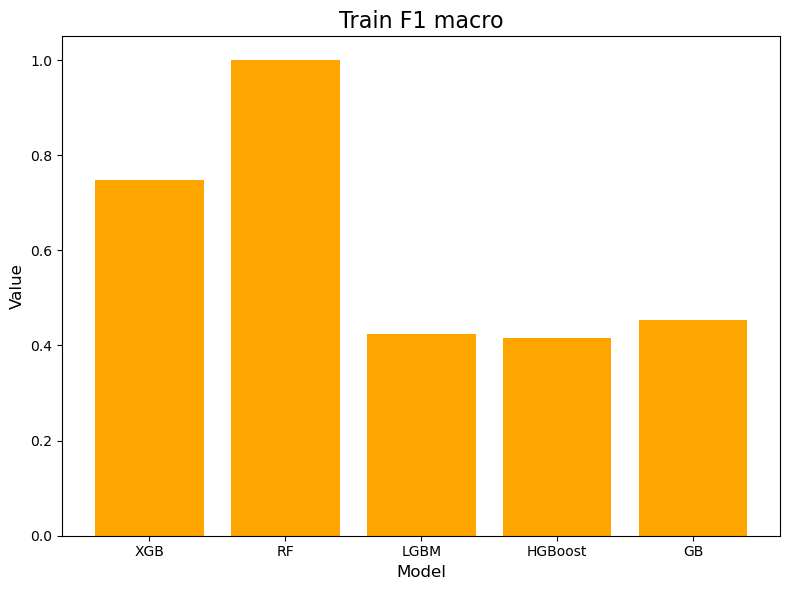

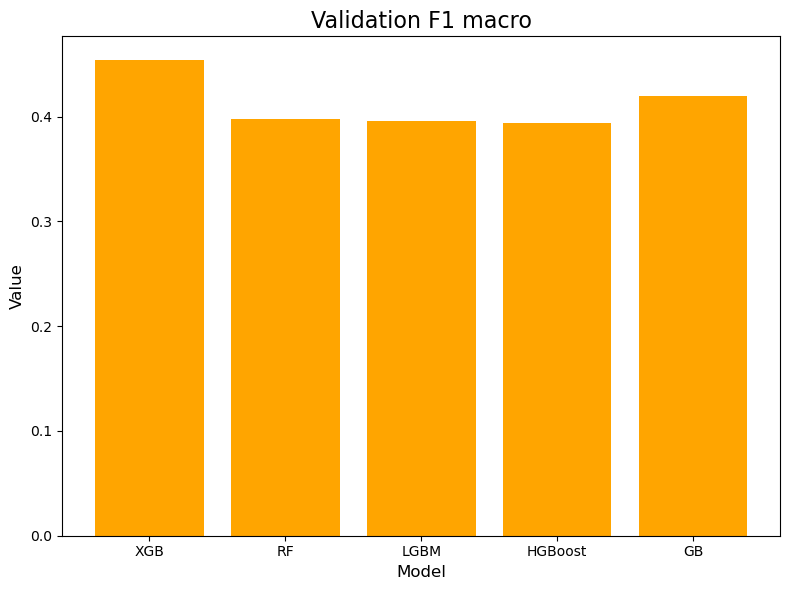

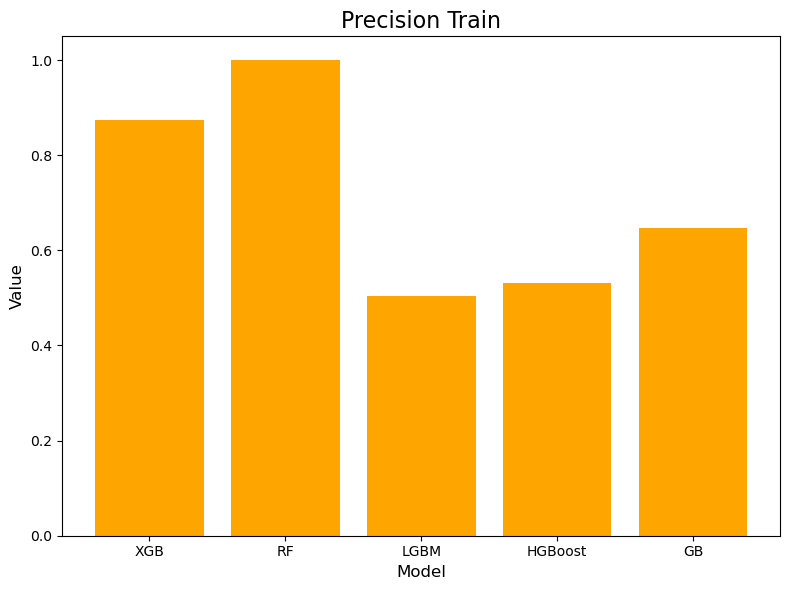

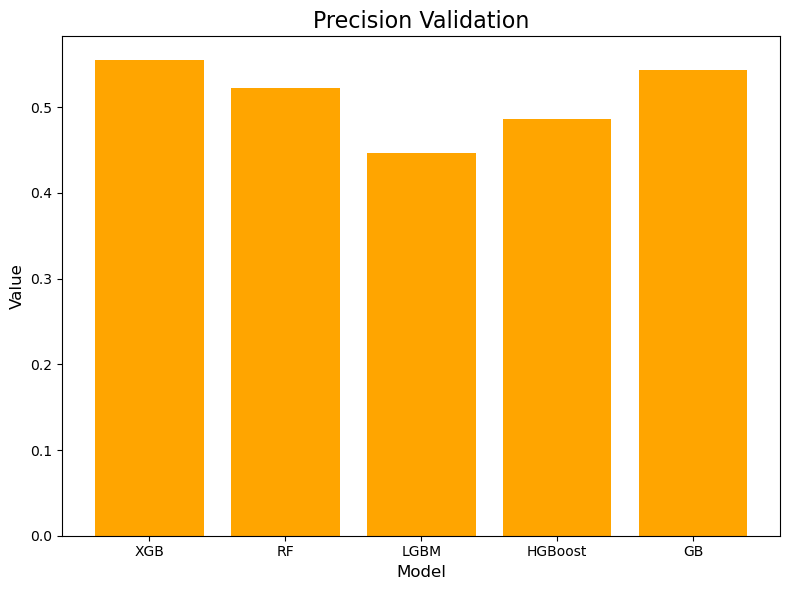

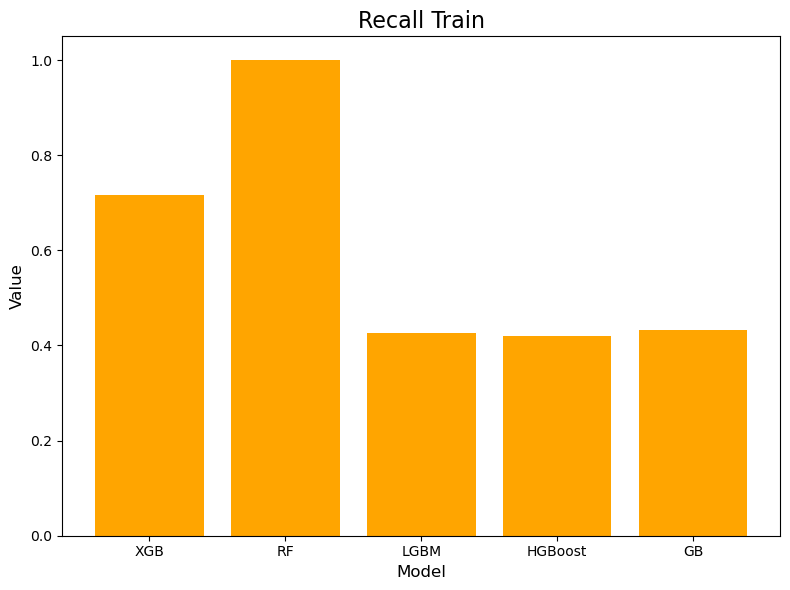

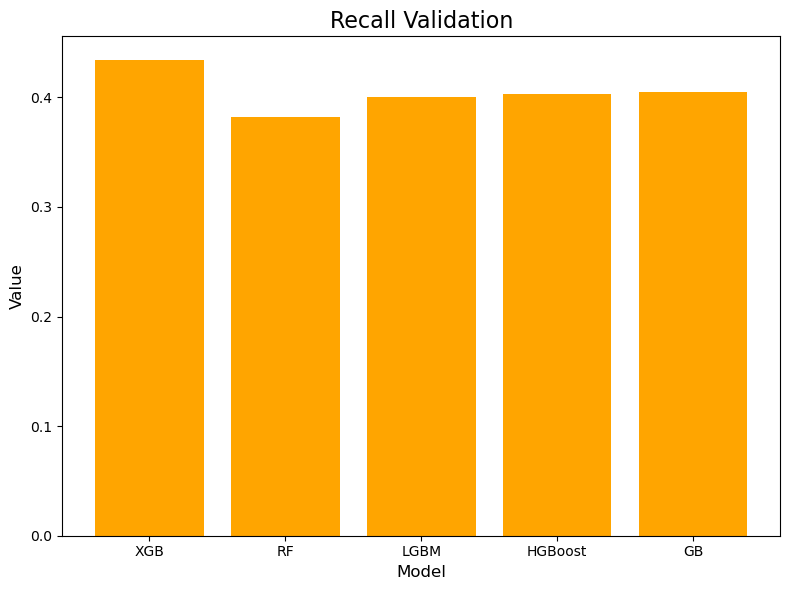

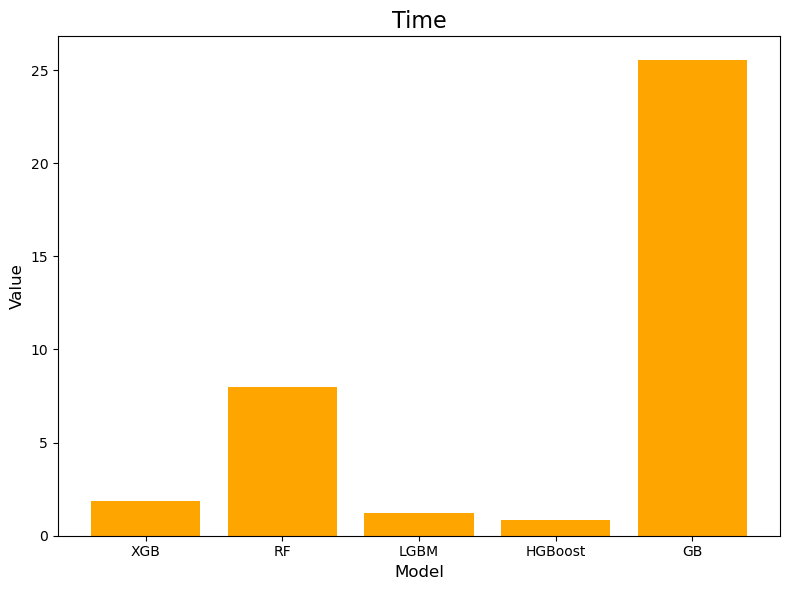

In [48]:
v.plot_metrics_kfold(compare_models)

**XGB Classifier**

In [5]:
method = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)

In [6]:
params = {'XGB': {'learning_rate': 0.4, 'n_estimators': 200}}

In [25]:
# XGB_params_all_feat = mod.k_fold(method, X, y, test1, 'XGB', random_state = 2, params = params,
#               enc = 'count', outliers = True,
#               file_name = None,
#               under_sample = False, over_sample = False)

# XGB_simple_all_feat = mod.k_fold(method, X, y, test1, 'XGB', random_state = 2, params = {},
#               enc = 'count', outliers = True,
#               file_name = None,
#               under_sample = False, over_sample = False)

Claim Injury Type
1    231136
3    116985
2     54892
4     38464
0      9442
5      3357
7       374
6        77
Name: count, dtype: int64
This Fold took 1.84 minutes
Claim Injury Type
1    231136
3    116976
2     54888
4     38469
0      9418
5      3356
7       374
6        77
Name: count, dtype: int64
This Fold took 2.4 minutes
Claim Injury Type
1    231157
3    116967
2     54880
4     38474
0      9423
5      3360
7       375
6        78
Name: count, dtype: int64
This Fold took 2.56 minutes
Claim Injury Type
1    231140
3    117010
2     54863
4     38458
0      9424
5      3358
7       375
6        76
Name: count, dtype: int64
This Fold took 2.28 minutes
Claim Injury Type
1    231151
3    117034
2     54877
4     38459
0      9429
5      3357
7       374
6        76
Name: count, dtype: int64
This Fold took 2.42 minutes
Claim Injury Type
1    231136
3    116985
2     54892
4     38464
0      9442
5      3357
7       374
6        77
Name: count, dtype: int64
This Fold took 1.39 m

In [7]:
# filtered_XGB_params_10f = mod.k_fold(method, X, y, test1, 'XGB', random_state = 2, params = params, 
#               enc = 'count', outliers = True, col = cols,
#               file_name = 'filtered_XGB_params_10f',
#               under_sample = False, over_sample = False)

filtered_XGB_no_params_15f = mod.k_fold(method, X, y, test1, 'XGB', random_state = 2, params = {}, 
              enc = 'count', outliers = True, col = cols,
              file_name = 'filtered_XGB_no_params_15f',
              under_sample = False, over_sample = False)

filtered_XGB_params_freq_15f = mod.k_fold(method, X, y, test1, 'XGB', random_state = 2, params = params, 
              enc = 'freq', outliers = True, col = cols,
              file_name = 'filtered_XGB_params_freq_15f',
              under_sample = False, over_sample = False)

filtered_XGB_no_params_freq_15f = mod.k_fold(method, X, y, test1, 'XGB', random_state = 2, params = {}, 
              enc = 'freq', outliers = True, col = cols,
              file_name = 'filtered_XGB_no_params_freq_15f',
              under_sample = False, over_sample = False)

This Fold took 1.45 minutes
This Fold took 1.43 minutes
This Fold took 1.47 minutes
This Fold took 1.42 minutes
This Fold took 1.45 minutes
This Fold took 1.47 minutes
This Fold took 1.43 minutes
This Fold took 1.29 minutes
This Fold took 1.31 minutes
This Fold took 1.31 minutes
This Fold took 1.32 minutes
This Fold took 1.32 minutes
This Fold took 1.31 minutes
This Fold took 1.23 minutes
This Fold took 1.52 minutes
This Fold took 2.15 minutes
This Fold took 2.3 minutes
This Fold took 2.61 minutes
This Fold took 3.38 minutes
This Fold took 4.12 minutes
This Fold took 4.19 minutes
This Fold took 5.68 minutes
This Fold took 6.17 minutes
This Fold took 7.41 minutes
This Fold took 6.35 minutes
This Fold took 6.18 minutes
This Fold took 6.07 minutes
This Fold took 5.1 minutes
This Fold took 5.98 minutes
This Fold took 4.87 minutes
This Fold took 3.44 minutes
This Fold took 5.03 minutes
This Fold took 4.83 minutes
This Fold took 5.01 minutes
This Fold took 5.98 minutes
This Fold took 5.51 mi

In [8]:
#s.play_('audio.mp3')

Input #0, wav, from '/var/folders/mm/fxsq_1490x9dd2w76tqvt3kr0000gn/T/tmp8lvmr5op.wav':
  Duration: 00:00:10.00, bitrate: 1536 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s16, 1536 kb/s


In [11]:
models = [filtered_XGB_no_params_15f, filtered_XGB_params_freq_15f, filtered_XGB_no_params_freq_15f]

model_names = ['filtered_XGB_no_params_15f', 'filtered_XGB_params_freq_15f', 'filtered_XGB_no_params_freq_15f']

m.metrics2(models, model_names)

,filtered_XGB_no_params_15f,filtered_XGB_params_freq_15f,filtered_XGB_no_params_freq_15f
Train F1 macro,0.658+/-0.002,0.745+/-0.001,0.657+/-0.002
Validation F1 macro,0.457+/-0.011,0.456+/-0.007,0.451+/-0.01
Precision Train,0.829+/-0.002,0.874+/-0.001,0.828+/-0.002
Precision Validation,0.586+/-0.038,0.556+/-0.016,0.567+/-0.024
Recall Train,0.64+/-0.003,0.715+/-0.001,0.64+/-0.002
Recall Validation,0.439+/-0.01,0.437+/-0.008,0.435+/-0.011
Time,1.382+/-0.084,4.837+/-1.587,4.027+/-1.792


**Best Model**

In [61]:
num = [
    "Accident Date Day",
    "Accident Date Month",
    "Accident to Assembly Time",
    "Accident to C-2 Time",
    "Age at Injury",
    "Assembly Date Year",
    "Assembly to C-2 Time",
    "Average Weekly Wage",
    "Average Weekly Wage Sqrt",
    "Birth Year",
    "C-2 Date Day",
    "C-2 Date Month",
    "C-2 Date Year",
    "IME-4 Count",
    "IME-4 Count Log"]

categ = [
    "Accident Date Day of Week", 
    "Assembly Date Day of Week",
    "Age Group",
    "Alternative Dispute Resolution Enc",
    "Attorney/Representative Enc",
    "Carrier Name Enc",
    "Carrier Type Enc",
    "C-2 Date Day of Week",
    "C-3 Date Binary",
    "COVID-19 Indicator Enc",
    "County of Injury Enc",
    "District Name Enc",
    "First Hearing Date Binary",
    "Gender Enc",
    "Industry Code",
    "Industry Sector Enc",
    "Medical Fee Region Enc",
    "WCIO Cause of Injury Code",
    "WCIO Codes",
    "WCIO Nature of Injury Code",
    "WCIO Part Of Body Code"]

cols = num + categ

In [67]:
params = {'XGB': {'learning_rate': 0.4, 'n_estimators': 200}}

In [68]:
method = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

filtered_XGB_params_5f = mod.k_fold(method, X, y, test1, 'XGB', 
                      random_state = 2, params = params, 
                      enc = 'count', outliers = True, col = cols,
                      file_name = 'filtered_XGB_params_5f_2',
                      under_sample = False, over_sample = False)

This Fold took 1.74 minutes
This Fold took 1.67 minutes
This Fold took 1.77 minutes
This Fold took 1.78 minutes
This Fold took 1.68 minutes


In [79]:
models = [filtered_XGB_params_5f]

model_names = ['filtered_XGB_params_5f']


m.metrics2(models, model_names)

,filtered_XGB_params_5f
Train F1 macro,0.758+/-0.002
Validation F1 macro,0.454+/-0.005
Precision Train,0.879+/-0.001
Precision Validation,0.552+/-0.008
Recall Train,0.726+/-0.002
Recall Validation,0.435+/-0.006
Time,1.728+/-0.045


In [78]:
#s.play_('audio.mp3')

Input #0, wav, from '/var/folders/mm/fxsq_1490x9dd2w76tqvt3kr0000gn/T/tmpexdybleg.wav':
  Duration: 00:00:10.00, bitrate: 1536 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 48000 Hz, 2 channels, s16, 1536 kb/s


**Compare Metrics**

Comparing the best model - filtered_XGB_params_10f (0.50334 score on kaggle) - with others

In [51]:
models = [XGB_simple_all_feat, XGB_params_all_feat, filtered_XGB_params, filtered_XGB_params_10f]

model_names = ['XGB_simple_all_feat', 'XGB_params_all_feat', 'filtered_XGB_params', 'filtered_XGB_params_10f']

m.metrics2(models, model_names)

,XGB_simple_all_feat,XGB_params_all_feat,filtered_XGB_params,filtered_XGB_params_10f
Train F1 macro,0.672+/-0.001,0.768+/-0.002,0.759+/-0.002,0.749+/-0.002
Validation F1 macro,0.451+/-0.003,0.454+/-0.002,0.456+/-0.004,0.457+/-0.006
Precision Train,0.839+/-0.002,0.885+/-0.001,0.88+/-0.001,0.875+/-0.001
Precision Validation,0.57+/-0.008,0.557+/-0.011,0.561+/-0.006,0.557+/-0.015
Recall Train,0.656+/-0.001,0.735+/-0.002,0.728+/-0.002,0.718+/-0.001
Recall Validation,0.434+/-0.005,0.434+/-0.003,0.435+/-0.005,0.437+/-0.006
Time,1.41+/-0.084,2.3+/-0.247,2.094+/-0.373,2.309+/-0.161
